# Question 1
- carat과 price의 경향을 비교하기 위한 scatterplot그래프를 출력하시오

In [1]:
import pandas as pd
# df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/diamonds.csv',index_col=0)
# df.to_csv('c:/workspace/cakd3/수업/dataset/diamond.csv')
df = pd.read_csv('c:/workspace/cakd3/수업/dataset/diamond.csv', index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


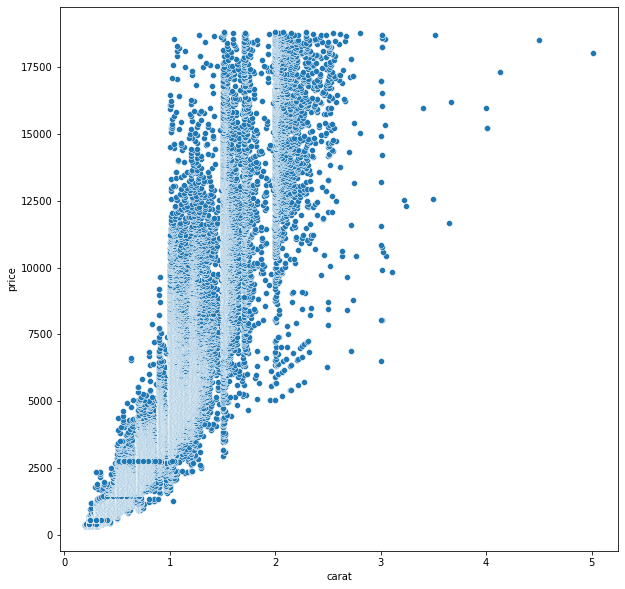

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='carat', y='price')
plt.show()

# Question 2
- carat과 price사이의 상관계수와 상관계수의 p-value값은?

In [3]:
df[['carat', 'price']].corr().iloc[0,1]

0.9215913011934687

In [4]:
# 풀이
from scipy import stats
print(stats.pearsonr(df['carat'],df['price']))
corr, p_value = stats.pearsonr(df['carat'],df['price'])
p_value

(0.9215913011934804, 0.0)


0.0

# Question 3
- color에 따른 price 값의 분포는 아래와 같다.

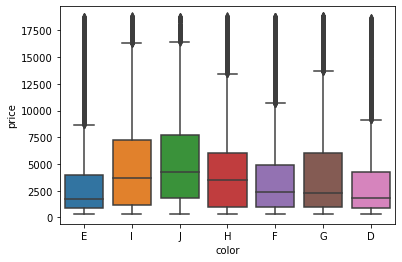

In [5]:
import seaborn as sns
sns.boxplot(data=df, x='color',y='price')
plt.show()

# Question 3-1
- Diamond의 평균가격은 3932로 알려져있다. ‘H’ color를 가지는 다이아몬드 집단의 평균에 대한 일표본 t검정을 시행하려한다. 통계량과 pvalue값을 구하시오. 유의수준 0.05에서 귀무가설 채택여부를 boolean 값으로 표현할 변수(hypo) 만들고 출력하시오

In [6]:
# 풀이
from scipy.stats import ttest_1samp

df_H = df[df['color']=='H']
print(ttest_1samp(df_H['price'], 3932))
t_stats, p_value = ttest_1samp(df_H['price'], 3932)

if p_value<0.05:
    hypo = False
else:
    hypo = True
    
print(f't statistic : {t_stats}')
print(f'p_value : {p_value}')
print(hypo)

Ttest_1sampResult(statistic=11.988997411117696, pvalue=7.569973305218302e-33)
t statistic : 11.988997411117696
p_value : 7.569973305218302e-33
False


# Question 3-2
- 그래프상에서 ‘F’와 ‘G’는 평균이 유사해보인다.이를 확인하기 위해 집단간 등분산(levene,fligner,bartlett) 검정을 시행 후 결과를 출력하고 조건에 맞는 독립표본 t검정을 시행하라

In [7]:
# 풀이
from scipy.stats import levene
from scipy.stats import fligner
from scipy.stats import bartlett
from scipy.stats import ttest_ind

F = df[df['color']=='F']
G = df[df['color']=='G']

print(stats.levene(F['price'], G['price']))
print(stats.fligner(F['price'], G['price']))
print(stats.bartlett(F['price'], G['price']))
### 등분산검정(levene, fligner, bartlett)결과, 유의수준 0.05에서 등분산 귀무가설 기각. F,G의 분산은 같지 않다

ttest_ind(F['price'],G['price'])
print(ttest_ind(F['price'],G['price'], equal_var=False)) # 등분산가정 = False
### 독립표본 t검정 결과, 유의수준 0.05에서 F와 G의 평균이 같다는 귀무가설 기각

LeveneResult(statistic=53.627886257416655, pvalue=2.511093007074788e-13)
FlignerResult(statistic=37.04347553879807, pvalue=1.155244880009172e-09)
BartlettResult(statistic=47.52732212014331, pvalue=5.424264079257202e-12)
Ttest_indResult(statistic=-5.045279980436125, pvalue=4.5670321227041464e-07)


# Question 3-3
- color ‘F’,’G’,’D’ 세집단의 price값들에 대해 anova분석을 시행하라.

In [8]:
# 풀이
from scipy.stats import bartlett
from scipy.stats import levene
from scipy.stats import fligner
from scipy.stats import f_oneway

F = df[df['color']=='F']
G = df[df['color']=='G']
D = df[df['color']=='D']

print(bartlett(F['price'], G['price'], D['price']))
print(levene(F['price'], G['price'], D['price']))
print(fligner(F['price'], G['price'], D['price']))
print(f_oneway(F['price'], G['price'], D['price']))
### 등분산검정(levene, fligner, bartlett)결과, 유의수준 0.05에서 등분산 귀무가설 기각. F,G,D의 분산은 같지 않다
### ANOVA 결과, 유의수준 0.05에서 F,G,D의 분산이 같다는 귀무가설을 기각(세집단 중 어느 두집단의 평균은 같지 않다)

BartlettResult(statistic=289.1436443252346, pvalue=1.6340125811454025e-63)
LeveneResult(statistic=118.97521469312785, pvalue=3.557425577381817e-52)
FlignerResult(statistic=494.6459169558573, pvalue=3.881538382653629e-108)
F_onewayResult(statistic=101.1811790316069, pvalue=1.6513790091285713e-44)


# Question 4
- 연속형 변수(carat,depth,table,price,x,y,z) 각각의 이상치(1,3분위값에서 IQR*1.5 외의 값) 갯수를 데이터 프레임(변수명 ratio_df, 비율의 내림차순 정렬)으로 아래와 같이 나타내어라.

In [64]:
import numpy as np
lst=[]
for i in [df.carat, df.depth, df.table, df.price, df.x, df.y, df.z]:
    Q1, Q3 = np.percentile(i, [25,75])
    IQR = Q3-Q1
    outlier = i.loc[(i<=Q1-(IQR*1.5))|(i>=Q3+(IQR*1.5))]
    lst.append(len(outlier))
outliers = pd.DataFrame(lst,columns=['ratio'])
outliers['column'] = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
outliers.sort_values(by='ratio', ascending=False, inplace=True)
outliers[['column','ratio']]

,column,ratio
3,price,3540
1,depth,2545
0,carat,2154
2,table,606
6,z,49
4,x,32
5,y,29


In [65]:
# 풀이
lst = []
for col in ['carat','depth','table','price','x','y','z']:
    target = df[col]
    iqr = target.quantile(0.75) - target.quantile(0.25)
    outlier = target.loc[(target > target.quantile(0.75) +iqr*1.5) | (target < target.quantile(0.25) - iqr*1.5)]
    lst.append([col,len(outlier)])
pd.DataFrame(lst).rename(columns={0:'column',1:'ratio'}).sort_values('ratio',ascending=False)

,column,ratio
3,price,3540
1,depth,2545
0,carat,1889
2,table,605
6,z,49
4,x,32
5,y,29


# Question 5
- color에 따른 price의 max, min, 평균값을 colorDf 변수에 저장하고 아래와 같이 출력하는 코드를 작성하라

In [ ]:
# 풀이
df.groupby('color')['price'].agg(['max','min','mean'])

,max,min,mean
color,,,
D,18693,357,3169.954096
E,18731,326,3076.752475
F,18791,342,3724.886397
G,18818,354,3999.135671
H,18803,337,4486.669196
I,18823,334,5091.874954
J,18710,335,5323.818020


# Question 6
- 전체 데이터중 color의 발생빈도수에 따라 labelEncoding(빈도수 적은것 : 1, 빈도수 증가할수록 1씩증가)을 하고 colorLabel 컬럼에 저장하고 cut에 따른 colorLabel의 평균값을 구하여라

In [44]:
# 풀이
dic= {x: i+1 for i, x in enumerate(list(df.groupby('color').size().sort_values().index))}
df['colorLabel'] = df['color'].map(lambda x: dic[x])
df.groupby('cut')[['colorLabel']].mean()

,colorLabel
cut,
Fair,4.516770
Good,4.562780
Ideal,4.769152
Premium,4.644913
Very Good,4.654362


# Question 7
- price의 값에 따른 구간을 1000단위로 나누고 priceLabel 컬럼에 저장하라. 저장시 숫자 순으로 label하고(0~1000미만 : 0,1000이상~2000미만 :1 …) 최종적으로 구간별 갯수(변수명:labelCount)를 출력하라

In [60]:
df['priceLabel'] = df['price']//1000
df.priceLabel.value_counts().to_frame()

,priceLabel
0,14499
1,9704
2,6131
4,4653
3,4226
5,3174
6,2278
7,1669
8,1307
9,1076


In [63]:
# 풀이
df['priceLabel'] = df['price'].map(lambda x: x//1000)
df[['priceLabel']].value_counts().to_frame().reset_index().rename(columns={0:'counts'})

,priceLabel,counts
0,0,14499
1,1,9704
2,2,6131
3,4,4653
4,3,4226
5,5,3174
6,6,2278
7,7,1669
8,8,1307
9,9,1076
